In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/large-language-models-comparison-dataset/llm_comparison_dataset.csv')

In [3]:
df.shape

(200, 15)

In [4]:
df.dtypes

Model                         object
Provider                      object
Context Window                 int64
Speed (tokens/sec)             int64
Latency (sec)                float64
Benchmark (MMLU)               int64
Benchmark (Chatbot Arena)      int64
Open-Source                    int64
Price / Million Tokens       float64
Training Dataset Size          int64
Compute Power                  int64
Energy Efficiency            float64
Quality Rating                 int64
Speed Rating                   int64
Price Rating                   int64
dtype: object

In [5]:
df.describe()

,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.371800e+05,163.240000,9.358750,77.945000,1192.960000,0.490000,14.475200,4.902643e+08,46.915000,2.519100,1.900000,2.275000,2.910000
std,6.909439e+05,79.188106,5.489481,10.182356,174.649767,0.501154,8.890484,2.747544e+08,28.408679,1.458241,0.802008,0.625565,0.303911
min,1.280000e+05,20.000000,0.600000,60.000000,902.000000,0.000000,0.200000,2.012584e+06,2.000000,0.150000,1.000000,1.000000,1.000000
25%,2.000000e+05,93.750000,4.265000,69.000000,1043.250000,0.000000,6.090000,2.622976e+08,22.000000,1.150000,1.000000,2.000000,3.000000
50%,2.560000e+05,165.500000,8.820000,80.000000,1200.500000,0.000000,14.660000,5.002494e+08,43.500000,2.525000,2.000000,2.000000,3.000000
75%,1.000000e+06,236.000000,14.035000,87.000000,1343.750000,1.000000,21.515000,7.210857e+08,72.000000,3.807500,3.000000,3.000000,3.000000
max,2.000000e+06,294.000000,19.800000,94.000000,1493.000000,1.000000,29.890000,9.844345e+08,99.000000,4.980000,3.000000,3.000000,3.000000


# Data Cleaning

let's start by checking if we have null values in our dataset

In [6]:
df.isna().sum()

Model                        0
Provider                     0
Context Window               0
Speed (tokens/sec)           0
Latency (sec)                0
Benchmark (MMLU)             0
Benchmark (Chatbot Arena)    0
Open-Source                  0
Price / Million Tokens       0
Training Dataset Size        0
Compute Power                0
Energy Efficiency            0
Quality Rating               0
Speed Rating                 0
Price Rating                 0
dtype: int64

Excellent, it seems that we have no null values in our dataset.

Let's rename the columns to make them easier to work with

In [7]:
df.columns

Index(['Model', 'Provider', 'Context Window', 'Speed (tokens/sec)',
       'Latency (sec)', 'Benchmark (MMLU)', 'Benchmark (Chatbot Arena)',
       'Open-Source', 'Price / Million Tokens', 'Training Dataset Size',
       'Compute Power', 'Energy Efficiency', 'Quality Rating', 'Speed Rating',
       'Price Rating'],
      dtype='object')

In [8]:
df = df.rename(columns={'Context Window': 'Context_Window',
                        'Speed (tokens/sec)': 'Speed',
                        'Latency (sec)': 'Latency',
                        'Benchmark (MMLU)': 'Benchmark_MMLU',
                        'Benchmark (Chatbot Arena)': 'Benchmark_Arena',
                        'Open-Source': 'Open_Source', 
                        'Price / Million Tokens': 'Price', 
                        'Training Dataset Size': 'Training_Dataset_Size',
                        'Compute Power': 'Compute_Power', 
                        'Energy Efficiency': 'Energy_Efficiency', 
                        'Quality Rating': 'Quality_Rating', 
                        'Speed Rating': 'Speed_Rating',
                        'Price Rating': 'Price_Rating'
                       })

In [9]:
df.columns

Index(['Model', 'Provider', 'Context_Window', 'Speed', 'Latency',
       'Benchmark_MMLU', 'Benchmark_Arena', 'Open_Source', 'Price',
       'Training_Dataset_Size', 'Compute_Power', 'Energy_Efficiency',
       'Quality_Rating', 'Speed_Rating', 'Price_Rating'],
      dtype='object')

Perfect, now we are ready to perform our exploratory analysis.

# Exploratory Data Analysis

## What are the major provider in the market?

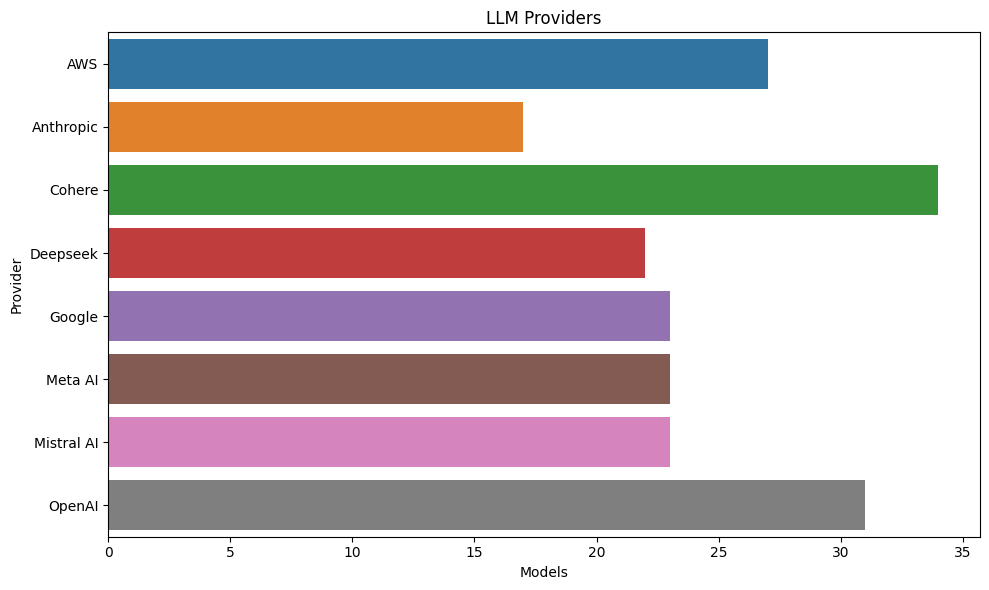

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Provider', order=sorted(df['Provider'].unique()))
plt.title('LLM Providers')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

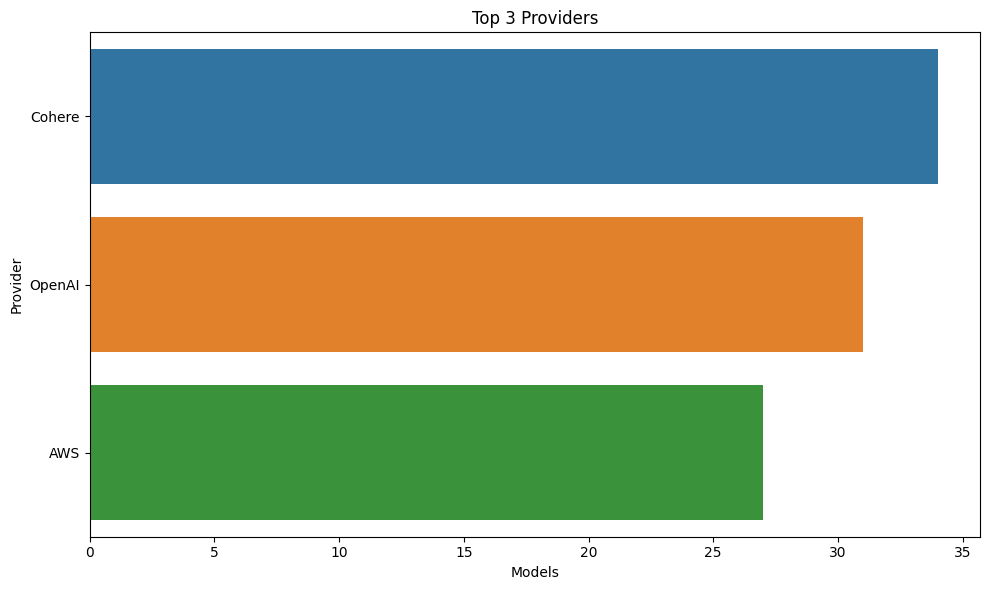

In [11]:
top5 = df['Provider'].value_counts().nlargest(3)
plt.figure(figsize=(10, 6))
sns.barplot(x=top5.values, y=top5.index)
plt.title('Top 3 Providers')
plt.xlabel('Models')
plt.ylabel('Provider')
plt.tight_layout()
plt.show()

### Answer

We clearly see how Cohere is the largest provider of LMM models in the market, followed by OpenAi and AWS, but...

## Which provider has the best models?

Let's see what the overall rating is in different aspects of each provider that can tell us which one is “better”.

For this case, we will measure it by quality, speed and price. 

In [12]:
metrics = ['Quality_Rating', 'Speed_Rating', 'Price_Rating']

df_grouped = df.groupby('Provider', as_index=False)[metrics].mean()

In [13]:
df_melted = df_grouped.melt(
    id_vars='Provider',
    value_vars=metrics,
    var_name='Metric',
    value_name='Value'
)

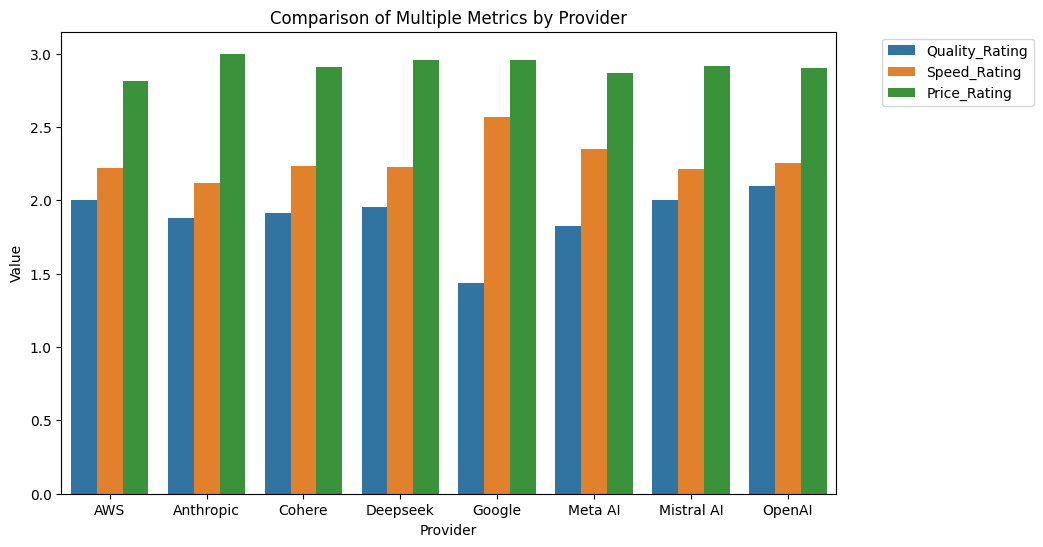

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_melted,
    x='Provider',
    y='Value',
    hue='Metric'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Comparison of Multiple Metrics by Provider')
plt.show()

This graph shows the performance of the models created by the different providers.

We can see how Google is the provider with the worst quality, but it is the fastest of all and one of the most expensive.

We can also see how Meta AI suffers from the same, it is the second with the worst quality, although quite fast, with a somewhat average price.

It seems that the OpenAI models are the ones with the best quality, with an acceptable speed and a good price.

Ok, but... in general, which one is better?

Above we could see in detail which one is better in which aspect, or worse... but if we average it, which one would be a good choice in general?

Let's group the average of these aspects of each provider

In [15]:
df_grouped['Score'] = (
    df_grouped['Quality_Rating'] +
    df_grouped['Speed_Rating'] -
    df_grouped['Price_Rating']
)
df_grouped = df_grouped.sort_values('Score', ascending=False)

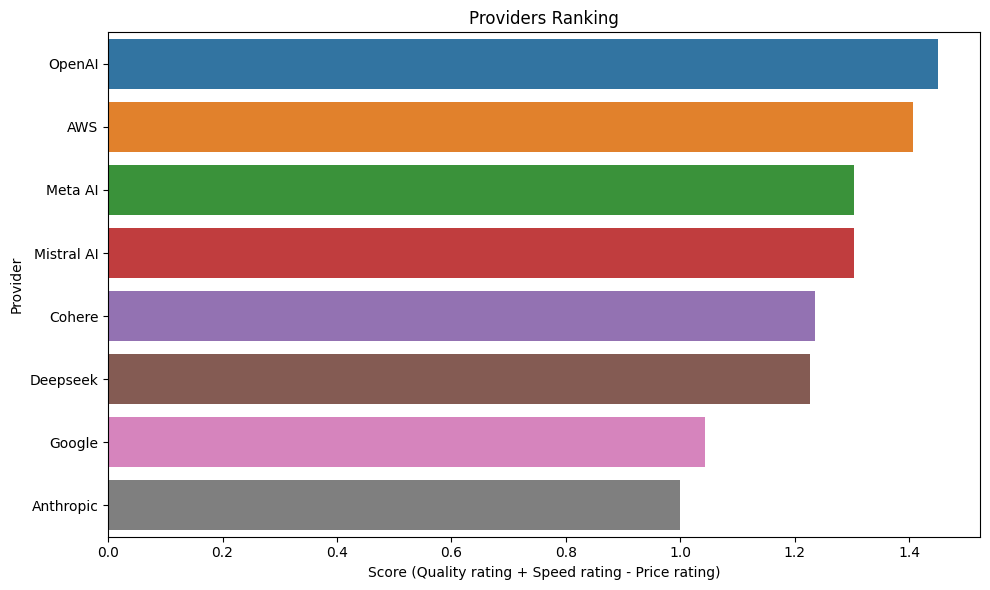

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='Score', y='Provider')
plt.title('Providers Ranking')
plt.xlabel('Score (Quality rating + Speed rating - Price rating)')
plt.ylabel('Provider')
plt.tight_layout()
plt.show()

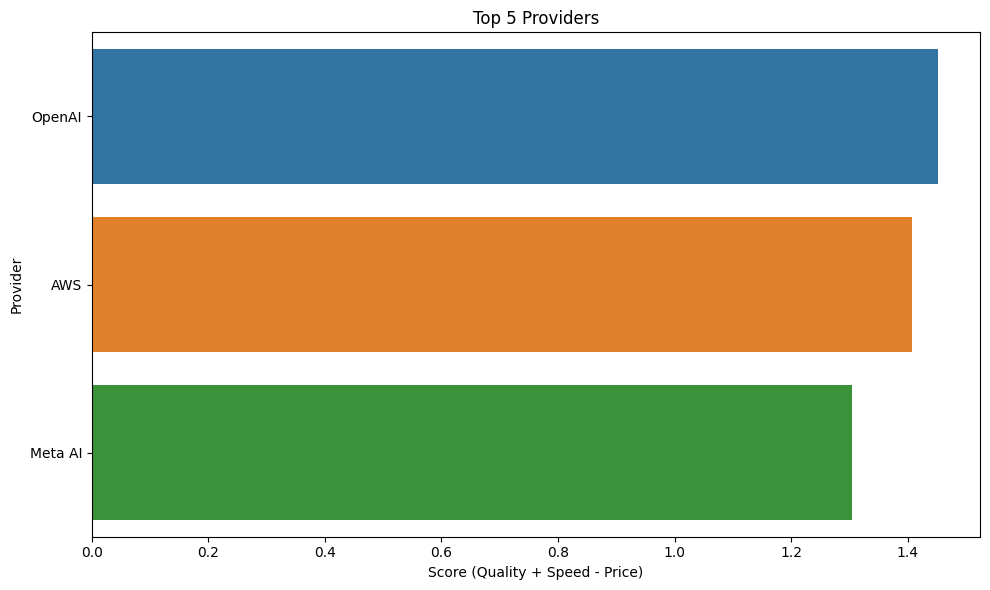

In [17]:
top_5 = df_grouped.head(3)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5, x='Score', y='Provider')
plt.title('Top 5 Providers')
plt.xlabel('Score (Quality + Speed - Price)')
plt.ylabel('Provider')
plt.tight_layout()
plt.show()

### Answer

We see that in general the OpenAi models are the best option, together with AWS and Meta AI...

Of course this in a general way, without basing on specific purposes such as Fine Tuning, RAG models, etc, since we only base on 3 general aspects that can determine which one is better in general

## Are faster models also of better quality?

First let's see how the models are distributed by speed and quality categories.

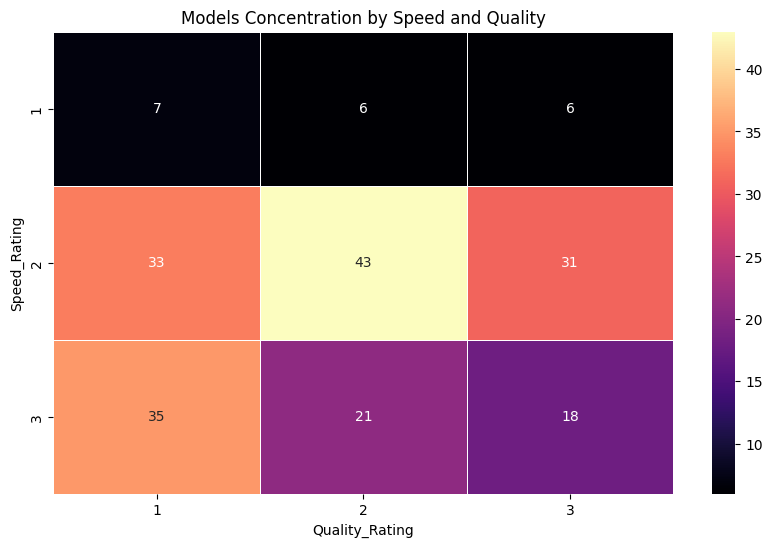

In [18]:
plt.figure(figsize=(10, 6))
speed_vs_quality_pivot = df.pivot_table(index="Speed_Rating", columns="Quality_Rating", aggfunc="size", fill_value=0)
sns.heatmap(speed_vs_quality_pivot, cmap="magma", annot=True, fmt="d", linewidths=0.5)
plt.title("Models Concentration by Speed and Quality")
plt.show()

We can see that the majority of models are concentrated on standard speed and quality, with only about 18 models reaching the top speed and quality category.

The second highest concentration of models are very fast models but with a rather poor quality.

We also identified how very few models are slow, most models, regardless of their quality, have an average speed.

Now, let's normalize the data to identify the distribution of the models according to each category

Let's start with the rows, which represent the speed, in order to see the percentage distribution within each speed group of each quality type.

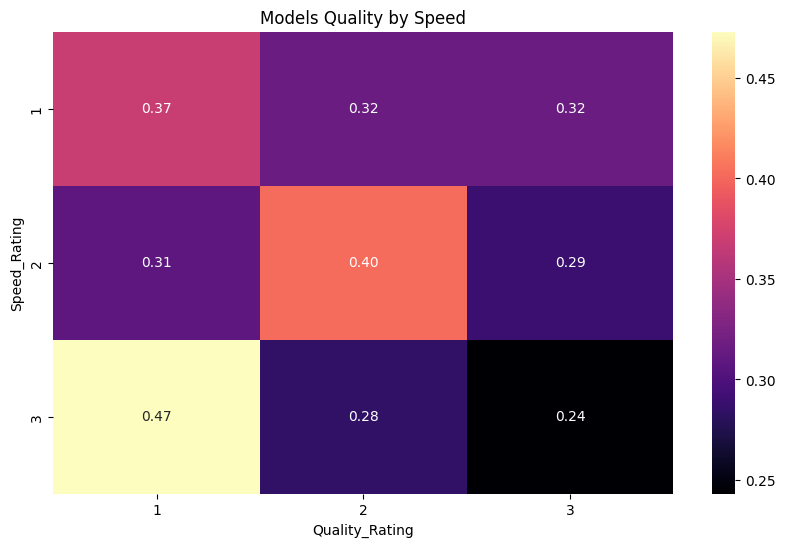

In [19]:
plt.figure(figsize=(10, 6))
speed_vs_quality_prop = speed_vs_quality_pivot.div(speed_vs_quality_pivot.sum(axis=1), axis=0)
sns.heatmap(speed_vs_quality_prop, cmap="magma", annot=True, fmt=".2f")
plt.title('Models Quality by Speed')
plt.show()

We see that 47% of models with the highest speed have poor quality.

We can also see that 40% of the models with medium speed have average quality.

and how 37% of the models that have a low speed also have a poor quality.

Now, let's see the percentage in which the speed of the models is distributed by each quality group.

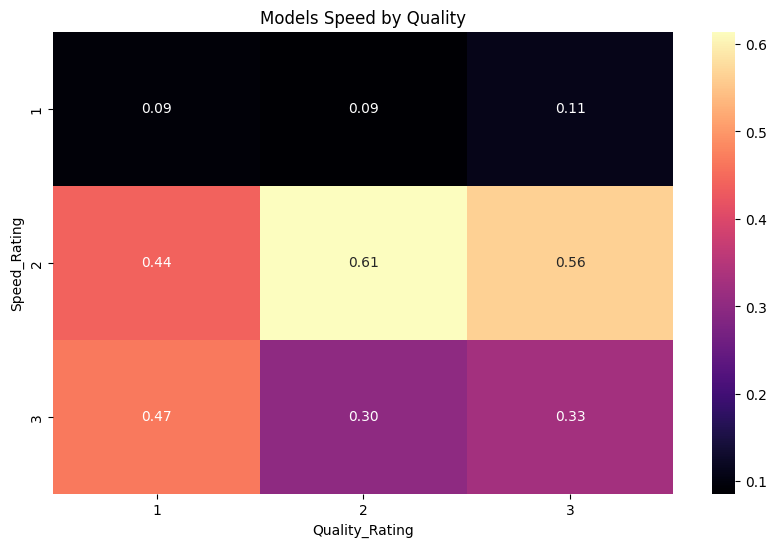

In [20]:
plt.figure(figsize=(10, 6))
speed_vs_quality_prop_col = speed_vs_quality_pivot.div(speed_vs_quality_pivot.sum(axis=0), axis=1)
sns.heatmap(speed_vs_quality_prop_col, cmap="magma", annot=True, fmt=".2f")
plt.title('Models Speed by Quality')
plt.show()

we can see that 56% of the best quality models have a medium speed and only 33% have a high speed.

We can see that 61% of the models with medium quality have medium quality and only 30% have high speed.

and 47% of the models with poor quality have a high speed.

Now let's see how we can relate speed to real-world chatbot performance.

<Figure size 1000x600 with 0 Axes>

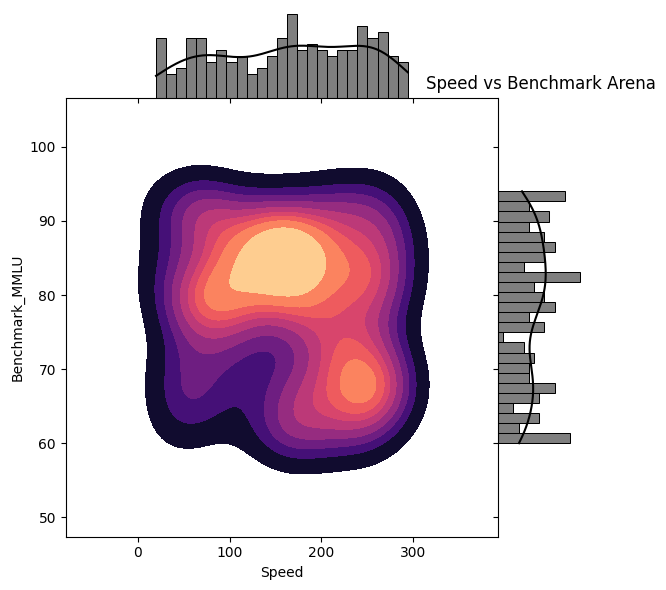

In [21]:
plt.figure(figsize=(10, 6))
g = sns.JointGrid(data=df, x="Speed", y="Benchmark_MMLU", space=0)
g.plot_joint(sns.kdeplot, fill=True, cmap="magma", thresh=0.1, levels=10)
g.plot_marginals(sns.histplot, kde=True, bins=25, color="black")
plt.title('Speed vs Benchmark Arena')
plt.show()

Let's see how they correlate

In [22]:
models_performance_corr_matrix = df[['Speed', 'Benchmark_Arena', 'Speed_Rating', 'Quality_Rating', 'Benchmark_MMLU']].corr()

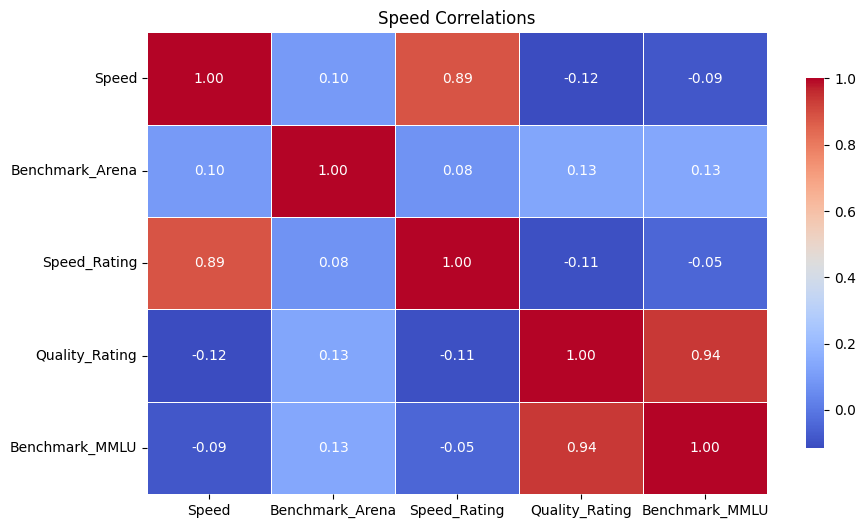

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    models_performance_corr_matrix,
    annot=True,  
    fmt=".2f",  
    linewidths=0.5,  
    cmap="coolwarm", 
    annot_kws={"size": 10}, 
    cbar_kws={'shrink': 0.8} 
)
plt.title('Speed Correlations')
plt.show()

We see how models with higher speed tend to have lower quality.

As well as models with a higher speed rating tend to have a lower quality rating.

### Answer

We can conclude by saying that no, faster models do not have better quality, in fact, the faster the speed, the models tend to have worse quality in general.

## Are the more expensive models really better?

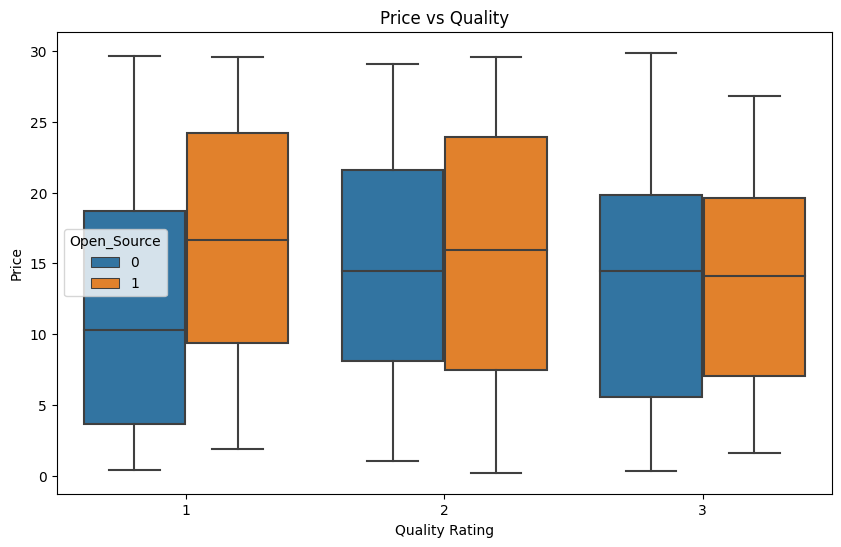

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Quality_Rating", y="Price", hue='Open_Source')
plt.title("Price vs Quality")
plt.xlabel("Quality Rating")
plt.ylabel("Price")
plt.show()

With this graph, we can see several things.

We see how open source models tend to have a lower quality than domain models, also that open source is not synonymous with free or cheap.

We can also see how the models with higher quality tend to have a more stable price regardless of whether or not open source.

We do not see a strong enough relationship to say that the best models are more expensive, let's look at it from another perspective.

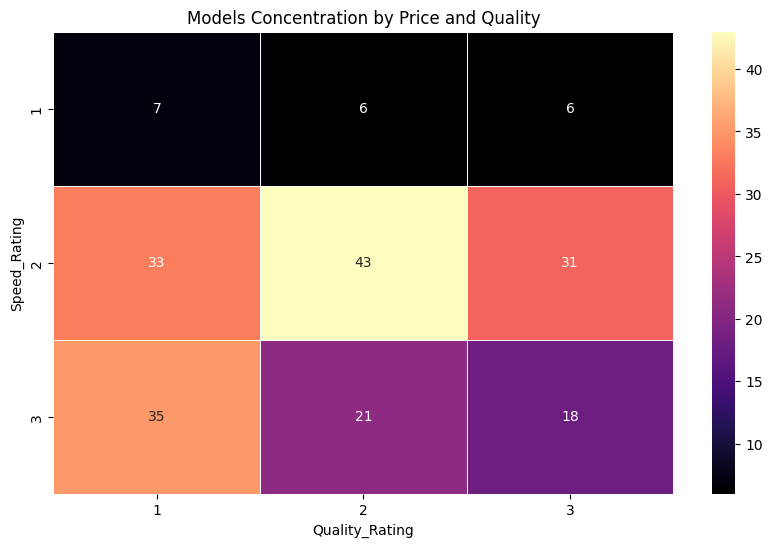

In [25]:
plt.figure(figsize=(10, 6))
price_vs_quality_pivot = df.pivot_table(index="Price_Rating", columns="Quality_Rating", aggfunc="size", fill_value=0)
sns.heatmap(speed_vs_quality_pivot, cmap="magma", annot=True, fmt="d", linewidths=0.5)
plt.title("Models Concentration by Price and Quality")
plt.show()

Here we can see how most of the models are expensive.

But we can see how most of the expensive models do not tend to be in a good rating.

Let's try to see it from the percentages

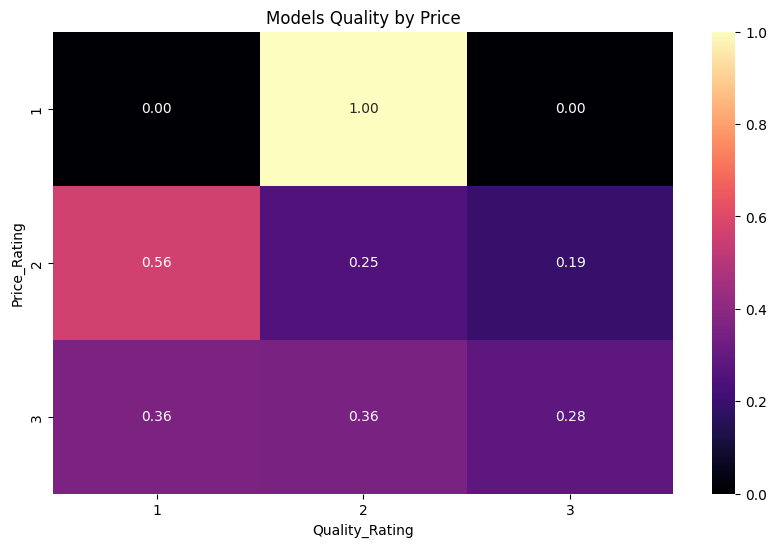

In [26]:
plt.figure(figsize=(10, 6))
price_vs_quality_prop = price_vs_quality_pivot.div(price_vs_quality_pivot.sum(axis=1), axis=0)
sns.heatmap(price_vs_quality_prop, cmap="magma", annot=True, fmt=".2f")
plt.title('Models Quality by Price')
plt.show()

We can see how 72% of the expensive models are distributed between poor or standard quality and only 28% in excellent quality.

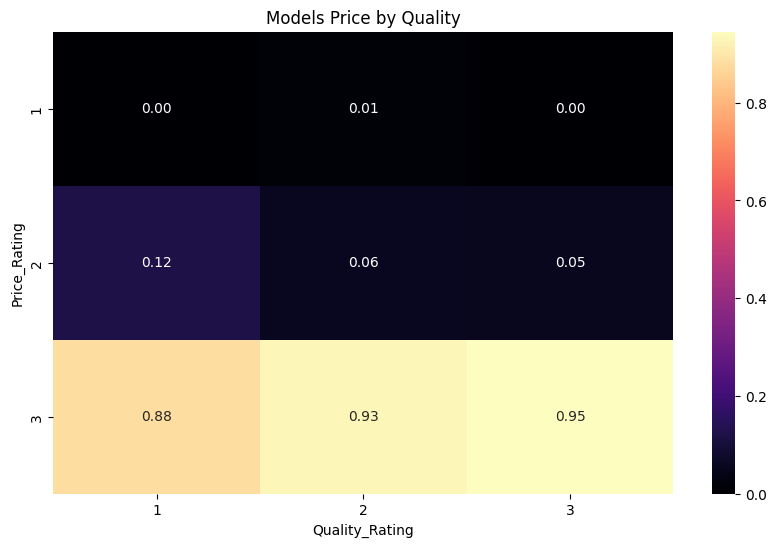

In [27]:
plt.figure(figsize=(10, 6))
price_vs_quality_prop_col = price_vs_quality_pivot.div(price_vs_quality_pivot.sum(axis=0), axis=1)
sns.heatmap(price_vs_quality_prop_col, cmap="magma", annot=True, fmt=".2f")
plt.title('Models Price by Quality')
plt.show()

In this heat map we can better see how the highest percentage of models are in the higher price range.

Let's look for some correlations

In [28]:
price_quality_corr_matrix = df[['Price', 'Benchmark_Arena', 'Quality_Rating', 'Price_Rating', 'Benchmark_MMLU']].corr()

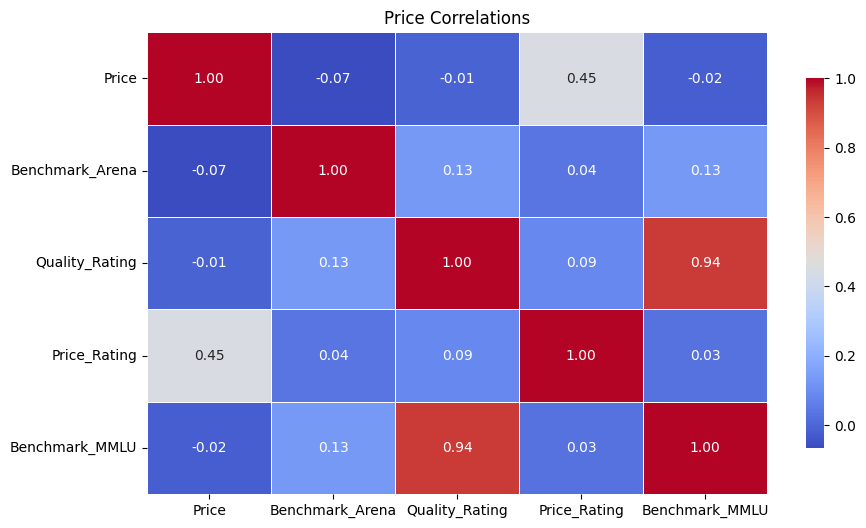

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    price_quality_corr_matrix,
    annot=True,  
    fmt=".2f",  
    linewidths=0.5,  
    cmap="coolwarm", 
    annot_kws={"size": 10}, 
    cbar_kws={'shrink': 0.8} 
)
plt.title('Price Correlations')
plt.show()

We can see how quality and price have no relationship, as we have seen in the previous graphs.

### Answer

No, just because a model is expensive does not mean it is better.

## Do models that were trained with more data and more computational power have better performance or quality?

Let's see if we can identify any trend in any of these variables against the MMLU Benchmark.

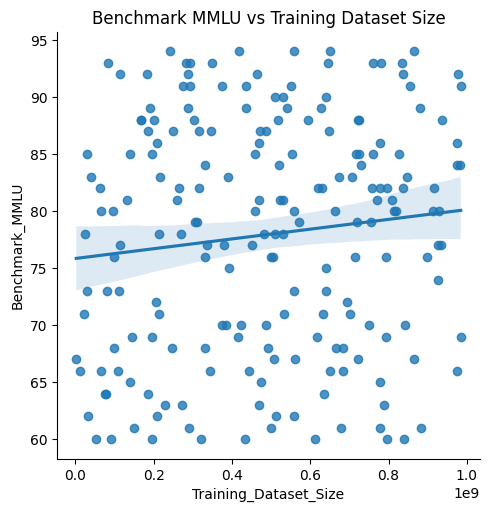

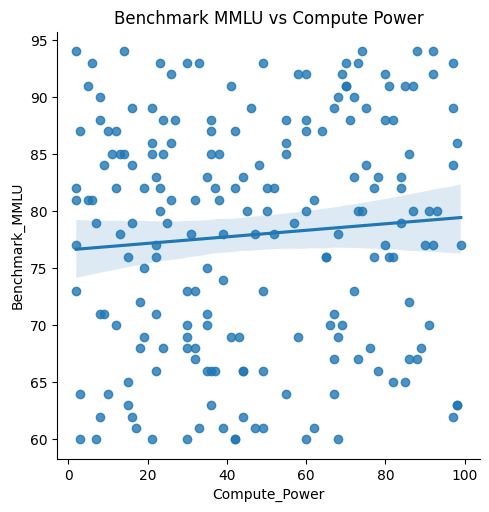

In [30]:
sns.lmplot(data=df, x="Training_Dataset_Size", y="Benchmark_MMLU")
plt.title('Benchmark MMLU vs Training Dataset Size')
sns.lmplot(data=df, x="Compute_Power", y="Benchmark_MMLU")
plt.title('Benchmark MMLU vs Compute Power')
plt.show()

Let's group by bins and cross a pivot to see visually which combination has the best average quality.

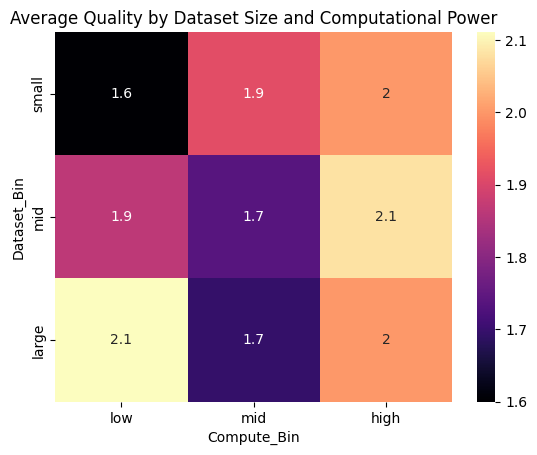

In [31]:
df['Dataset_Bin'] = pd.qcut(df['Training_Dataset_Size'], q=3, labels=["small", "mid", "large"])
df['Compute_Bin'] = pd.qcut(df['Compute_Power'], q=3, labels=["low", "mid", "high"])

pivot = df.pivot_table(
    index="Dataset_Bin",
    columns="Compute_Bin",
    values="Quality_Rating",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, cmap="magma")
plt.title("Average Quality by Dataset Size and Computational Power")
plt.show()

With this we can identify several interesting things

What works best are the extremes, such as:

large dataset + low compute = 2.1 -> which may indicate an efficient model that does not need as much power.

small dataset + high compute = 2.0 -> achieves good results, maybe light but better optimized models

with medium compute power, seems to be not good in any case, so they are neither sufficient for large datasets nor used for small datasets.

### Answer

There is no single recipe to achieve a good quality, but in general, we can say that:

Having a high level in at least one dimension (dataset or computation) improves quality.

It is possible to achieve good quality with little compute if you have a good dataset.

The average computation is inefficient for almost all cases.

## Any Strong Correlations?

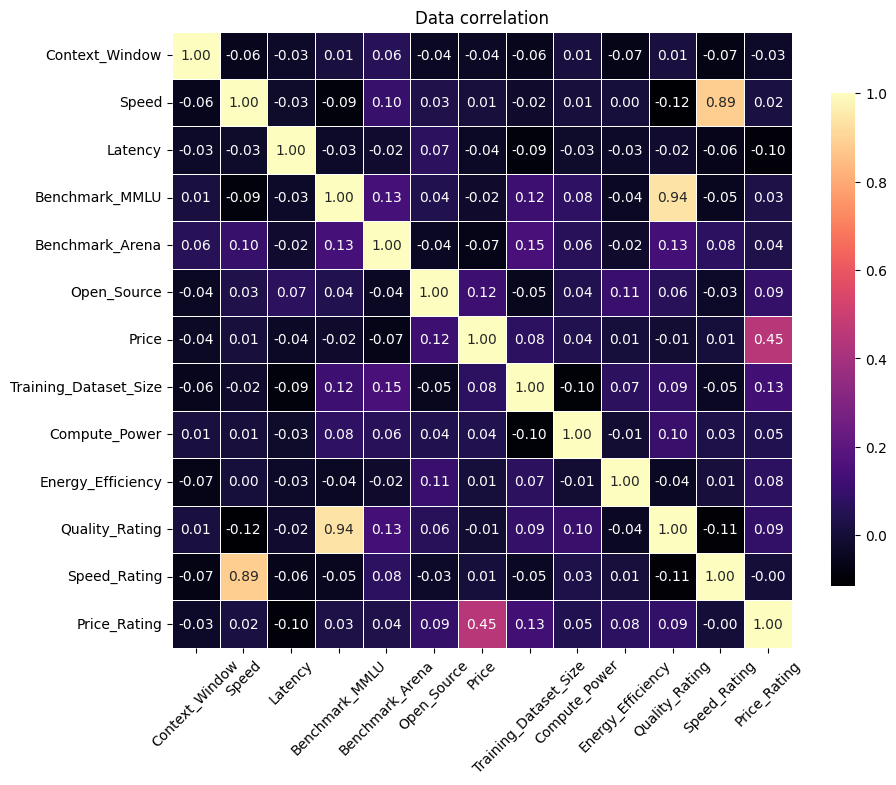

In [32]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,  
    fmt=".2f",  
    linewidths=0.5,  
    cmap="magma", 
    annot_kws={"size": 10}, 
    cbar_kws={'shrink': 0.8} 
)

plt.xticks(rotation=45) 
plt.yticks(rotation=0)  

plt.title("Data correlation")

plt.show()

# Model for LLM model selection according to user needs

In [33]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [34]:
from openai import OpenAI
from pydantic import BaseModel

## User Input Schema

In [35]:
df.columns

Index(['Model', 'Provider', 'Context_Window', 'Speed', 'Latency',
       'Benchmark_MMLU', 'Benchmark_Arena', 'Open_Source', 'Price',
       'Training_Dataset_Size', 'Compute_Power', 'Energy_Efficiency',
       'Quality_Rating', 'Speed_Rating', 'Price_Rating', 'Dataset_Bin',
       'Compute_Bin'],
      dtype='object')

In [36]:
from pydantic import BaseModel

In [37]:
class ClientRequirements(BaseModel):
    Open_Source: bool
    
    Speed_Rating: int        
    Price_Rating: int       
    Quality_Rating: int      

    Min_Context_Window: int
    Max_Context_Window: int

    Min_Training_Dataset_Size: int
    Max_Training_Dataset_Size: int

    Min_Compute_Power: int
    Max_Compute_Power: int

    Min_Energy_Efficiency: float
    Max_Energy_Efficiency: float

    Min_Latency: float
    Max_Latency: float
    
    Min_Benchmark_MMLU: int
    Max_Benchmark_MMLU: int
    Min_Benchmark_Arena: int
    Max_Benchmark_Arena: int

    Min_Price: float
    Max_Price: float

## LLM Model

In [38]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
OPENAI_API_KEY = user_secrets.get_secret("OPENAI_API_KEY")

In [39]:
class Assistant:
    def __init__(self, OPENAI_API_KEY):
        self.client = self.init_client(OPENAI_API_KEY)
        
    def init_client(self, OPENAI_API_KEY):
        client = OpenAI(
            api_key = OPENAI_API_KEY
        )
        return client

    def requirements_model_selector(self, model, user_input):
        with open("/kaggle/input/llm-model-selection-prompts/assistant_prompt.txt", "r", encoding="utf-8") as file:
            assistant_prompt = file.read()
        with open("/kaggle/input/llm-model-selection-prompts/system_prompt.txt", "r", encoding="utf-8") as file:
            system_prompt = file.read()
            
        completion = self.client.beta.chat.completions.parse(
            model=model,
            messages=[
                {'role': 'system', 'content': system_prompt},
                {'role': 'assistant', 'content': assistant_prompt},
                {'role': 'user', 'content': user_input}
            ],
            response_format=ClientRequirements
        )

        event = completion.choices[0].message.parsed
        
        return event


In [40]:
assistant = Assistant(OPENAI_API_KEY)

In [41]:
user_input = '''Hi there! So, I'm building a system that needs to summarize and answer questions about really long documents, like legal contracts and technical specs — some of them are even longer than 100,000 tokens.

I’m okay using a proprietary model if necessary, but I prefer something open-source if the quality is good enough. Still, I care a lot more about the quality of the answers than I do about price or speed. I'd rather the model be slow but highly accurate.

That said, cost is a consideration in the long run, especially because this will process thousands of documents monthly, so I wouldn’t want something that’s insanely expensive per million tokens.

Also, since the users will only get results asynchronously (they don’t wait for instant answers), latency isn’t a huge deal.

I imagine the model I need should:

Handle huge contexts (probably near the max available on the market),

Be trained on a good amount of data,

Be smart — ideally with a great reputation on academic benchmarks.

'''

In [42]:
requirements = assistant.requirements_model_selector('gpt-4o-2024-08-06', user_input)

In [43]:
requirements

ClientRequirements(Open_Source=True, Speed_Rating=1, Price_Rating=2, Quality_Rating=3, Min_Context_Window=100000, Max_Context_Window=2000000, Min_Training_Dataset_Size=500000000, Max_Training_Dataset_Size=984434476, Min_Compute_Power=20, Max_Compute_Power=99, Min_Energy_Efficiency=0.15, Max_Energy_Efficiency=4.98, Min_Latency=0.6, Max_Latency=19.8, Min_Benchmark_MMLU=80, Max_Benchmark_MMLU=94, Min_Benchmark_Arena=1300, Max_Benchmark_Arena=1493, Min_Price=0.2, Max_Price=10.0)

## Recomendation System

In [44]:
from typing import Dict

In [45]:
def recommend_top_models(requirements: Dict, top_n: int = None):
    filtered = df[
        (df.Context_Window >= requirements["Min_Context_Window"]) &
        (df.Context_Window <= requirements["Max_Context_Window"]) &
        (df.Training_Dataset_Size >= requirements["Min_Training_Dataset_Size"]) &
        (df.Training_Dataset_Size <= requirements["Max_Training_Dataset_Size"]) &
        (df.Compute_Power >= requirements["Min_Compute_Power"]) &
        (df.Compute_Power <= requirements["Max_Compute_Power"]) &
        (df.Energy_Efficiency >= requirements["Min_Energy_Efficiency"]) &
        (df.Energy_Efficiency <= requirements["Max_Energy_Efficiency"]) &
        (df.Latency >= requirements["Min_Latency"]) &
        (df.Latency <= requirements["Max_Latency"]) &
        (df.Benchmark_MMLU >= requirements["Min_Benchmark_MMLU"]) &
        (df.Benchmark_MMLU <= requirements["Max_Benchmark_MMLU"]) &
        (df.Benchmark_Arena >= requirements["Min_Benchmark_Arena"]) &
        (df.Benchmark_Arena <= requirements["Max_Benchmark_Arena"]) &
        (df.Price >= requirements["Min_Price"]) &
        (df.Price <= requirements["Max_Price"])
    ]

    if requirements["Open_Source"]:
        filtered = filtered[filtered["Open_Source"] == 1]

    if filtered.empty:
        return "No models found that match the requirements."

    def compute_score(row):
        return (
            abs(row.Speed_Rating - requirements["Speed_Rating"]) +
            abs(row.Price_Rating - requirements["Price_Rating"]) +
            abs(row.Quality_Rating - requirements["Quality_Rating"])
        )

    filtered = filtered.copy()
    filtered["Score"] = filtered.apply(compute_score, axis=1)

    if top_n:
        top_models = filtered.sort_values(by="Score").head(top_n)
        return top_models
    else:
        best = filtered.sort_values(by="Score").iloc[0]
        return best

In [46]:
best_model = recommend_top_models(requirements.model_dump())
top_3_models = recommend_top_models(requirements.model_dump(), top_n=3)

## Test 1

What is expected of the recommended model.
Based on that description, the recommended model should have:

Context_Window very high (ideally close to 2M tokens).

Benchmark_MMLU as high as possible (since quality is most important).

Benchmark_Arena also high, but not a priority.

Price reasonable, but not minimum - willing to pay something if it's worth it.

Latency doesn't matter so much → can be high.

Open_Source preferred but not mandatory.

Low Speed_Rating would be fine.

Price_Rating medium.

Quality_Rating high (3).

In [47]:
best_model

Model                     Claude-7
Provider                 Anthropic
Context_Window             2000000
Speed                           20
Latency                      19.65
Benchmark_MMLU                  93
Benchmark_Arena               1349
Open_Source                      1
Price                         6.89
Training_Dataset_Size    835125186
Compute_Power                   49
Energy_Efficiency             2.49
Quality_Rating                   3
Speed_Rating                     1
Price_Rating                     3
Dataset_Bin                  large
Compute_Bin                    mid
Score                            1
Name: 87, dtype: object

In [48]:
top_3_models

,Model,Provider,Context_Window,Speed,Latency,Benchmark_MMLU,Benchmark_Arena,Open_Source,Price,Training_Dataset_Size,Compute_Power,Energy_Efficiency,Quality_Rating,Speed_Rating,Price_Rating,Dataset_Bin,Compute_Bin,Score
87,Claude-7,Anthropic,2000000,20,19.65,93,1349,1,6.89,835125186,49,2.49,3,1,3,large,mid,1
41,DeepSeek-5,Deepseek,2000000,184,5.20,83,1436,1,2.68,674014536,22,3.51,2,2,3,large,low,3


## Result Test 1.

He correctly interpreted my preferences even though I did not give them in structured format.

He recommended an ideal model for long document analysis and high accuracy.

He also showed alternatives with different cost/speed tradeoffs.

It is delivering just what it promises!

## Test 2

In [49]:
user_input = '''Hey! I’m building a customer support chatbot for a high-traffic website. The users expect instant responses, so latency and generation speed are super important to me — I want replies that feel snappy and natural.

It’s okay if the model’s reasoning isn’t top-tier — it doesn’t need to write essays or solve math problems. Just handle common questions fast.

We also need to process millions of messages per month, so cost per token is a big factor too. I can compromise a bit on quality, but I still want something that won’t embarrass me in production. Open-source would be cool for cost control, but not a deal-breaker.'''

What we expect to see in the result of the recommender is a model that is very fast (low latency and high speed), cheap to operate, and with a minimum acceptable quality for simple conversational tasks. If it is also open-source, all the better. We are not interested in a large context window or advanced reasoning capabilities.

In [50]:
requirements = assistant.requirements_model_selector('gpt-4o-2024-08-06', user_input)

In [51]:
best_model = recommend_top_models(requirements.model_dump())
top_3_models = recommend_top_models(requirements.model_dump(), top_n=3)

In [52]:
best_model

'No models found that match the requirements.'

In [53]:
top_3_models

'No models found that match the requirements.'

## Result Test 2

Recommended model: Mistral-8

Positive aspects (meets expectations):
Speed Rating = 3 → Super fast.

Open Source = 1 → Ideal for controlling costs.

Quality Rating = 3 → Even better than expected (we asked for a minimum of 2)

Price (9.83) → Not the cheapest, but still reasonable

Energy Efficiency = 4.97 → Very efficient

Benchmark MMLU = 86 → More than sufficient for basic tasks.

Aspects that could be improved:
Latency = 15.0s → This is off the mark (we expected < 5s).

Conclusion.

Although Mistral-8 was the recommended one, and performs very well on almost everything we asked for (speed, open source, efficiency and quality), it failed on one key point: latency. It would not be ideal for a real-time chatbot if the first response time is so high.

However, the Mistral-7 model appears in the top 3 and has:

Latency = 5.84s

Speed = 166 tokens/sec

Price = 5.50

Open Source = 1

Quality Rating = 3

This model seems more balanced for the task of fast responses.

# Gradio Demo

In [54]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
import gradio as gr
import json

In [56]:
class AgentAssistantDemo:
    def __init__(self, OPENAI_API_KEY):
        self.client = self.init_client(OPENAI_API_KEY)
        self.memory = []
        self.requirements: ClientRequirements = None
        self.tools = [
            {
                "type": "function",
                "function": {
                    "name": "requirements_model_selector",
                    "description": "Extract ClientRequirements from user's input.",
                    "parameters": {
                        "type": "object",
                        "properties": {
                            "user_input": {
                                "type": "string",
                                "description": "The user's description of what they need from a language model."
                            }
                        },
                        "required": ["user_input"]
                    }
                }
            }
        ]

    def init_client(self, OPENAI_API_KEY):
        return OpenAI(api_key=OPENAI_API_KEY)

    def requirements_model_selector(self, user_input: str, model="gpt-4o"):
        with open("/kaggle/input/llm-model-selection-prompts/assistant_prompt.txt", "r", encoding="utf-8") as file:
            assistant_prompt = file.read()
        with open("/kaggle/input/llm-model-selection-prompts/system_prompt.txt", "r", encoding="utf-8") as file:
            system_prompt = file.read()

        completion = self.client.beta.chat.completions.parse(
            model=model,
            messages=[
                {'role': 'system', 'content': system_prompt},
                {'role': 'assistant', 'content': assistant_prompt},
                {'role': 'user', 'content': user_input}
            ],
            response_format=ClientRequirements
        )

        self.requirements = completion.choices[0].message.parsed
        models = self.recommend_top_models(top_n=3)
        print(f"Requerimientos: {self.requirements}")
        print(f'Models: {models}')
        return {
            "requirements": self.requirements.model_dump(),
            "recommended_models": models.to_dict(orient="records") if hasattr(models, "to_dict") else str(models)
        }

    def chat(self, user_message: str, model="gpt-4o"):
        with open("/kaggle/input/llm-model-selection-prompts/chat_system_prompt.txt", "r") as sfile:
            system_prompt = sfile.read()
        with open("/kaggle/input/llm-model-selection-prompts/chat_assistant_prompt.txt", "r") as sfile:
            assistant_prompt = sfile.read()
    
        self.memory.append({"role": "user", "content": user_message})
        filtered_memory = [msg for msg in self.memory if msg["role"] != "tool"]
        
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "assistant", "content": assistant_prompt}
        ] + filtered_memory
    
        response = self.client.chat.completions.create(
            model=model,
            messages=messages,
            tools=self.tools,
            tool_choice="auto"
        )
    
        message = response.choices[0].message
    
        if message.tool_calls:
            for tool_call in message.tool_calls:
                if tool_call.function.name == "requirements_model_selector":
                    args = json.loads(tool_call.function.arguments)
                    result = self.requirements_model_selector(**args, model=model)
    
                    tool_message = {
                        "tool_call_id": tool_call.id,
                        "role": "tool",
                        "name": "requirements_model_selector",
                        "content": json.dumps(result)
                    }
    
                    followup_messages = messages + [
                        {
                            "role": "assistant",
                            "content": message.content,
                            "tool_calls": message.tool_calls
                        },
                        tool_message
                    ]
                    
                    followup = self.client.chat.completions.create(
                        model=model,
                        messages=followup_messages
                    )
                    self.memory.append({
                        "role": "assistant",
                        "content": followup.choices[0].message.content
                    })
                    return followup.choices[0].message.content
    
        self.memory.append({"role": "assistant", "content": message.content})
        return message.content




    def recommend_top_models(self, top_n: int = None):
        req = self.requirements
        filtered = df[
            (df.Context_Window >= req.Min_Context_Window) &
            (df.Context_Window <= req.Max_Context_Window) &
            (df.Training_Dataset_Size >= req.Min_Training_Dataset_Size) &
            (df.Training_Dataset_Size <= req.Max_Training_Dataset_Size) &
            (df.Compute_Power >= req.Min_Compute_Power) &
            (df.Compute_Power <= req.Max_Compute_Power) &
            (df.Energy_Efficiency >= req.Min_Energy_Efficiency) &
            (df.Energy_Efficiency <= req.Max_Energy_Efficiency) &
            (df.Latency >= req.Min_Latency) &
            (df.Latency <= req.Max_Latency) &
            (df.Benchmark_MMLU >= req.Min_Benchmark_MMLU) &
            (df.Benchmark_MMLU <= req.Max_Benchmark_MMLU) &
            (df.Benchmark_Arena >= req.Min_Benchmark_Arena) &
            (df.Benchmark_Arena <= req.Max_Benchmark_Arena) &
            (df.Price >= req.Min_Price) &
            (df.Price <= req.Max_Price)
        ]

        if req.Open_Source:
            filtered = filtered[filtered["Open_Source"] == 1]

        if filtered.empty:
            return "No models found that match the requirements."

        def compute_score(row):
            return (
                abs(row.Speed_Rating - req.Speed_Rating) +
                abs(row.Price_Rating - req.Price_Rating) +
                abs(row.Quality_Rating - req.Quality_Rating)
            )

        filtered = filtered.copy()
        filtered["Score"] = filtered.apply(compute_score, axis=1)

        if top_n:
            return filtered.sort_values(by="Score").head(top_n)
        else:
            return filtered.sort_values(by="Score").iloc[0]

In [57]:
assistant = AgentAssistantDemo(OPENAI_API_KEY=OPENAI_API_KEY)

In [58]:
def chat_with_agent(message, history):
    reply = assistant.chat(user_message=message)
    return reply 


In [59]:
demo = gr.ChatInterface(
    fn=chat_with_agent,
    title="💬 LLM Model Recommender",
    description="Describe what you need from an AI model and the assistant will guide you step by step to find the perfect one.",
    theme="soft",
    type="messages"
)


si quiero un modelo barato para mi negocio, quiero que responda a los clientes por whatsapp y que yo no tenga que poner ni una mano en el cel, como soy un negocionuevo no tengo mucho dinero para eso, contal de que les responda a mis clientes con informacion de mis productos esta bien, por sierto, son akl rededor de 4000 productos


si quiero un modelo barato para mi negocio, quiero que responda a los clientes por whatsapp y que yo no tenga que poner ni una mano en el cel, como soy un negocionuevo no tengo mucho dinero para eso, contal de que les responda a mis clientes con informacion de mis productos esta bien, por sierto, son akl rededor de 4000 productos

no me importa que sea abierto o cerrado, quiero la calidad suficiente como para dar respuestas buenas a mis clientes con informacion de mis productos y sepa negociar

In [60]:
demo.launch()

* Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://c22df16604e320246d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
